<a href="https://colab.research.google.com/github/mattycars/DSAN_6600_Final_Project/blob/main/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

## Load Data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DL6600/FinalProject/DOGEUSDT.csv')

In [ ]:
df.head()

,timestamp,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,2019-07-05 12:00:00,0.00449,0.004600,0.003760,0.004200,60726008.0,2019-07-05 12:00:59.999,259378.004238,521,40516981.0,175346.099186,0
1,2019-07-05 12:01:00,0.00420,0.004387,0.004200,0.004300,84307704.0,2019-07-05 12:01:59.999,363010.820421,561,40173084.0,173854.886129,0
2,2019-07-05 12:02:00,0.00430,0.004475,0.004300,0.004475,48182744.0,2019-07-05 12:02:59.999,210231.775915,291,33036098.0,144634.353695,0
3,2019-07-05 12:03:00,0.00445,0.004450,0.004169,0.004250,66457853.0,2019-07-05 12:03:59.999,285857.801827,289,8266236.0,35932.694923,0
4,2019-07-05 12:04:00,0.00425,0.004385,0.004250,0.004350,22016425.0,2019-07-05 12:04:59.999,95310.619665,179,9954068.0,43020.451542,0


In [ ]:
print(df.dtypes)

timestamp                        object
open                            float64
high                            float64
low                             float64
close                           float64
volume                          float64
close_time                       object
quote_asset_volume              float64
number_of_trades                  int64
taker_buy_base_asset_volume     float64
taker_buy_quote_asset_volume    float64
ignore                            int64
dtype: object


In [ ]:
# Ensure timestamp is in datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Set timestamp as the index (optional but helps for time series operations)
df.set_index('timestamp', inplace=True)

# EDA
## Shape

In [ ]:
print(df.shape)

(2841812, 12)


In [ ]:
print(df.isnull().sum())

timestamp                       0
open                            0
high                            0
low                             0
close                           0
volume                          0
close_time                      0
quote_asset_volume              0
number_of_trades                0
taker_buy_base_asset_volume     0
taker_buy_quote_asset_volume    0
ignore                          0
dtype: int64


## Minute Summary Statistics

In [ ]:
df.describe()

,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
count,2.841812e+06,2.841812e+06,2.841812e+06,2.841812e+06,2.841812e+06,2.841812e+06,2.841812e+06,2.841812e+06,2.841812e+06,2841812.0
mean,9.468246e-02,9.479306e-02,9.457086e-02,9.468273e-02,1.296913e+06,1.901925e+05,2.838330e+02,6.448719e+05,9.468127e+04,0.0
std,9.521111e-02,9.538801e-02,9.503279e-02,9.521140e-02,5.348883e+06,9.363030e+05,1.008939e+03,2.729982e+06,4.748949e+05,0.0
min,1.145400e-03,1.148800e-03,1.134500e-03,1.148800e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,3.415100e-03,3.417600e-03,3.413100e-03,3.415200e-03,6.560300e+04,1.224548e+03,8.000000e+00,1.460800e+04,3.202101e+02,0.0
50%,7.499000e-02,7.504000e-02,7.494000e-02,7.499000e-02,3.049550e+05,2.155001e+04,6.100000e+01,1.320610e+05,9.024719e+03,0.0
75%,1.349000e-01,1.350000e-01,1.348000e-01,1.349000e-01,9.294212e+05,9.411891e+04,1.970000e+02,4.563440e+05,4.547887e+04,0.0
max,7.376800e-01,7.399500e-01,7.341300e-01,7.380500e-01,6.184198e+08,1.418261e+08,1.419980e+05,2.876800e+08,5.622390e+07,0.0


## Daily Closing Price Graph

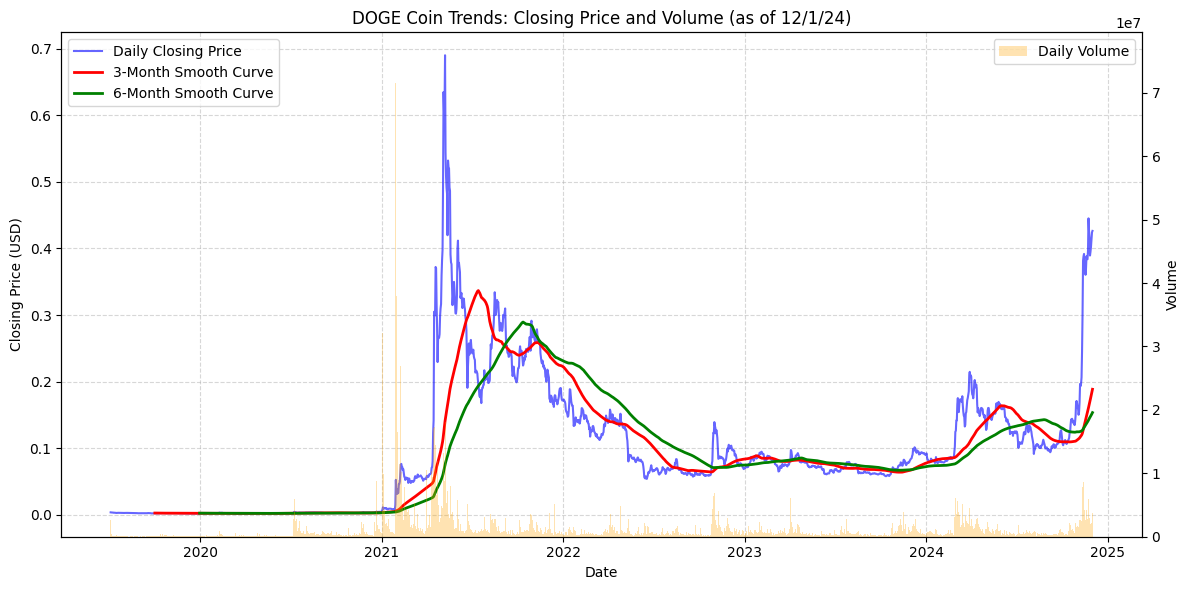

In [ ]:
# Select only numeric columns for aggregation
numeric_columns = ['open', 'high', 'low', 'close', 'volume', 'quote_asset_volume',
                   'number_of_trades', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume']

# Aggregate by day (mean of numeric columns)
df_daily = df[numeric_columns].resample('D').mean()

# Calculate rolling averages for 3 months and 6 months (90 and 180 days)
df_daily['3_month_avg'] = df_daily['close'].rolling(window=90).mean()
df_daily['6_month_avg'] = df_daily['close'].rolling(window=180).mean()


# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot closing price on the primary y-axis
ax1.plot(df_daily.index, df_daily['close'], label='Daily Closing Price', color='blue', alpha=0.6)
ax1.plot(df_daily.index, df_daily['3_month_avg'], label='3-Month Smooth Curve', color='red', linewidth=2)
ax1.plot(df_daily.index, df_daily['6_month_avg'], label='6-Month Smooth Curve', color='green', linewidth=2)

# Set labels and title for the primary y-axis
ax1.set_title('DOGE Coin Trends: Closing Price and Volume (as of 12/1/24)')
ax1.set_ylabel('Closing Price (USD)')
ax1.set_xlabel('Date')
ax1.legend(loc='upper left')
ax1.grid(True, linestyle='--', alpha=0.5)


# Plot volume on the secondary y-axis
ax2 = ax1.twinx()
ax2.bar(df_daily.index, df_daily['volume'], label='Daily Volume', color='orange', alpha=0.3, width=1)
ax2.set_ylabel('Volume')
ax2.legend(loc='upper right')

# Adjust layout for better spacing
fig.tight_layout()

# Show the plot
plt.show()


## Hourly Data in 2021

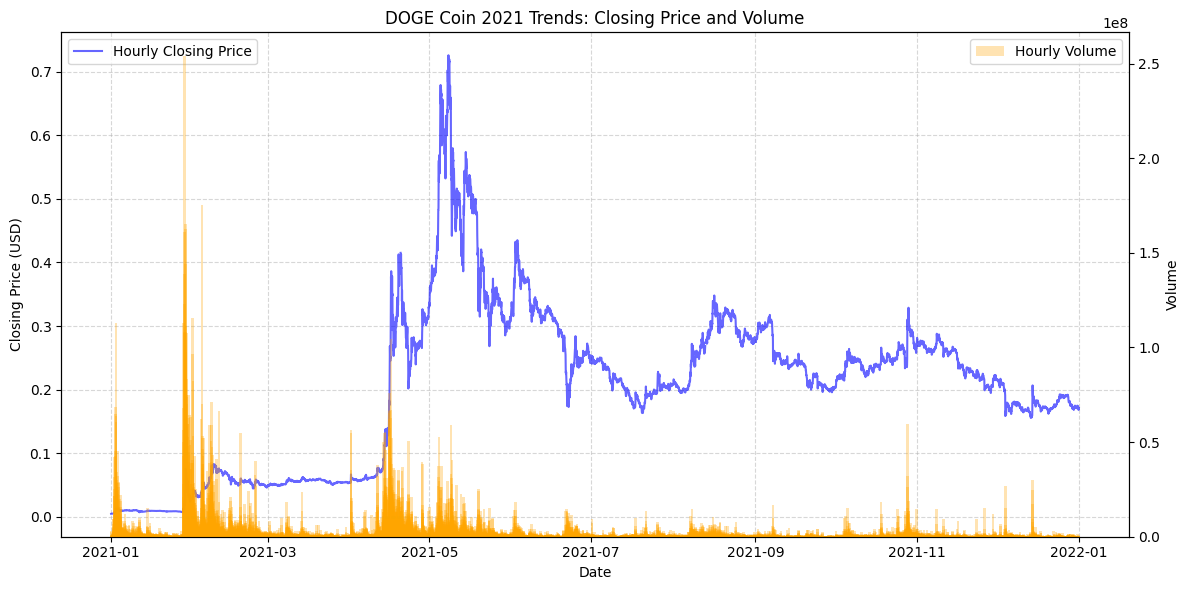

In [ ]:
# Ensure the 'timestamp' column is in datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Filter data for 2021
df_2021 = df[df['timestamp'].dt.year == 2021]

# Set timestamp as the index for resampling
df_2021.set_index('timestamp', inplace=True)

# Select only numeric columns for aggregation
numeric_columns = ['open', 'high', 'low', 'close', 'volume', 'quote_asset_volume',
                   'number_of_trades', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume']

# Resample by hour and calculate the mean of numeric columns
df_2021_hourly = df_2021[numeric_columns].resample('H').mean()

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot closing price on the primary y-axis
ax1.plot(df_2021_hourly.index, df_2021_hourly['close'], label='Hourly Closing Price', color='blue', alpha=0.6)

# Set labels and title for the primary y-axis
ax1.set_title('DOGE Coin 2021 Trends: Closing Price and Volume')
ax1.set_ylabel('Closing Price (USD)')
ax1.set_xlabel('Date')
ax1.legend(loc='upper left')
ax1.grid(True, linestyle='--', alpha=0.5)

# Plot volume on the secondary y-axis
ax2 = ax1.twinx()
ax2.bar(df_2021_hourly.index, df_2021_hourly['volume'], label='Hourly Volume', color='orange', alpha=0.3, width=1)
ax2.set_ylabel('Volume')
ax2.legend(loc='upper right')

# Adjust layout for better spacing
fig.tight_layout()

# Show the plot
plt.show()

## Daily summary statistics

In [ ]:
df_daily.describe()

,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,3_month_avg,6_month_avg,price_change,volatility
count,1977.000000,1977.000000,1977.000000,1977.000000,1.977000e+03,1.977000e+03,1977.000000,1.977000e+03,1.977000e+03,1888.000000,1798.000000,1976.000000,1947.000000
mean,0.094792,0.094902,0.094680,0.094792,1.299556e+06,1.910581e+05,286.111794,6.461686e+05,9.512039e+04,0.093387,0.094946,0.004569,0.048670
std,0.095381,0.095559,0.095202,0.095381,3.532920e+06,6.383205e+05,685.033832,1.770775e+06,3.201560e+05,0.081959,0.076366,0.082524,0.065696
min,0.001589,0.001590,0.001587,0.001589,2.049844e+04,4.419564e+01,0.339583,6.112847e+03,1.484154e+01,0.002151,0.002238,-0.380075,0.008253
25%,0.003421,0.003423,0.003420,0.003422,2.661935e+05,2.566702e+03,12.254348,1.328726e+05,1.295735e+03,0.004289,0.019796,-0.016574,0.023328
50%,0.074878,0.074925,0.074833,0.074880,5.576282e+05,4.410561e+04,97.147222,2.740351e+05,2.147293e+04,0.079493,0.079062,-0.000662,0.033581
75%,0.134887,0.135132,0.134693,0.134903,1.137895e+06,1.298838e+05,253.445139,5.635691e+05,6.482812e+04,0.136430,0.135472,0.015316,0.047060
max,0.690199,0.692111,0.688200,0.690158,7.574562e+07,1.222122e+07,10646.372917,3.763467e+07,6.259701e+06,0.336763,0.289513,2.478233,0.503313


## Correlations

<Axes: >

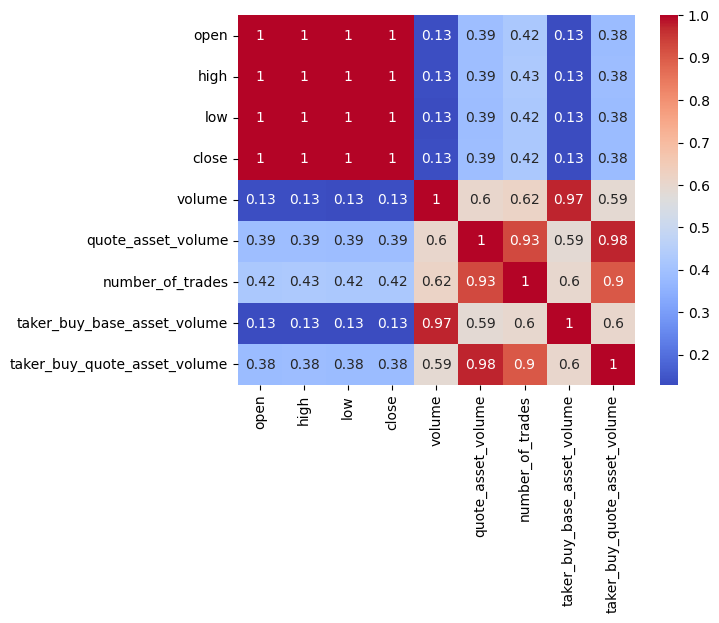

In [ ]:
correlation_matrix = df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

We can see that volume has a weak correlation with OHLC prices. Clearly price is a reaction to volume, especially as seen in our graph.

Due to high correlation to volume and quote asset volume, I will likely go ahead and remove taker_buy_base_asset_volume and taker_buy_quote_asset_volume.

We can see that if we are able to spot anomalous volume movements, we can likely spot large fluctuations in price before they happen.

## Daily Volatility

In [ ]:
# Compute daily price change (percentage)
df_daily['price_change'] = df_daily['close'].pct_change()

# Compute rolling volatility over a 30-day window
df_daily['volatility'] = df_daily['price_change'].rolling(window=30).std()


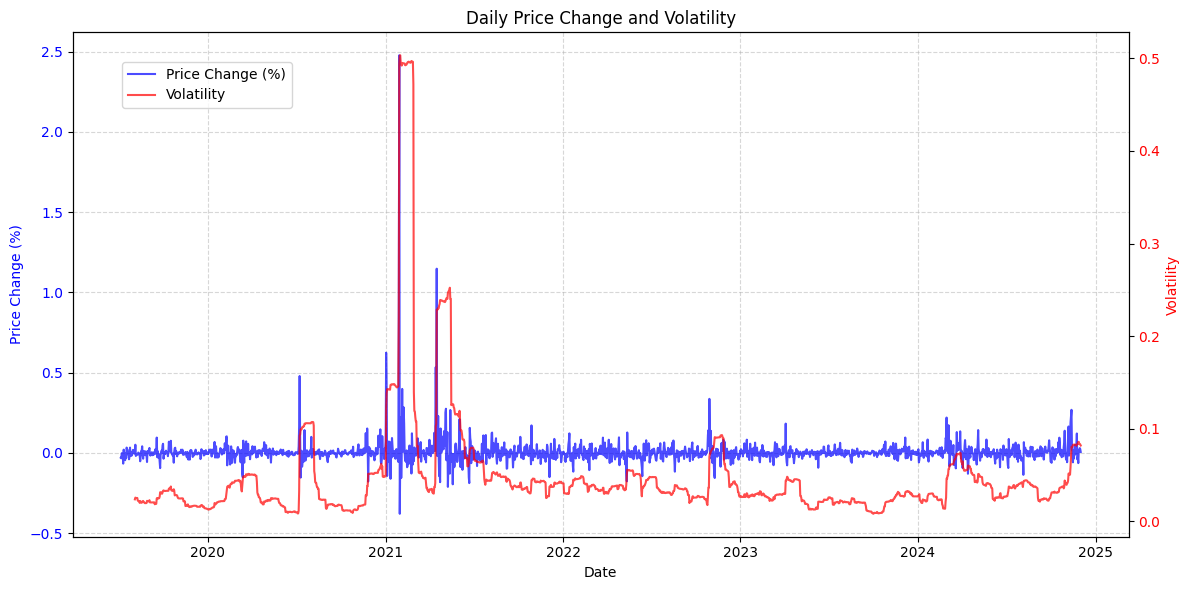

In [ ]:
# Plot settings
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot price change on the primary y-axis
ax1.plot(df_daily.index, df_daily['price_change'], label='Price Change (%)', color='blue', alpha=0.7)
ax1.set_ylabel('Price Change (%)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xlabel('Date')
ax1.set_title('Daily Price Change and Volatility')
ax1.grid(visible=True, linestyle='--', alpha=0.5)

# Create a secondary y-axis for volatility
ax2 = ax1.twinx()
ax2.plot(df_daily.index, df_daily['volatility'], label='Volatility', color='red', alpha=0.7)
ax2.set_ylabel('Volatility', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Legends
fig.tight_layout()
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

plt.show()

It is clear there is anomalous market activity happening in about the first 6 months of 2021. Looking at this and the daily close price graph, we can notice that the biggest price jumps are happening here in 2021 and also currently in 2024. Volatility, however, was far more high in 2021, a sign of highly speculative properties of the asset.

# Feature Engineering
I do not want to include price in my study as absolute price is not my goal here. I want to capture the features that end up EXPLAINING the overall price/market conditions. Here is my rationale:

**Use Case**: If you want the autoencoder to focus on learning patterns in the features that explain market dynamics, such as volume, volatility, and returns, and not focus on price, then you can remove the price columns and just use features like log returns or relative volume.

**Return**: If you're specifically interested in capturing returns (e.g., log_return), this could help the autoencoder learn the rate of change in price rather than the absolute price itself. This could be useful if you're modeling relative price changes and want to exclude raw price levels from the input.

**Anomaly Detection in Returns**: If your goal is to detect unusual price changes (e.g., spikes in volatility or sudden shifts in the market) rather than reconstructing exact price values, then using returns (or other derived features) may be a better option, as this might make the model more focused on relative changes and less on the price level.

In [ ]:
## Step 1: Remove the unwanted columns
df = df.drop(columns=['taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume'])


In [ ]:
# Step 2: Convert to hourly data by resampling (taking mean for continuous variables, sum for volume)

df_hourly = df.resample('H').agg({
    'open': 'first',
    'high': 'max',
    'low': 'min',
    'close': 'last',
    'volume': 'sum',
    'quote_asset_volume': 'sum',
    'number_of_trades': 'sum'
})

In [ ]:
# Step 3: Create Relative Volume (volume relative to the 24 hour average)
df_hourly['relative_volume'] = df_hourly['volume'] / df_hourly['volume'].rolling(window=24).mean()

# Step 4: Create Log Returns and Volatility (std of log returns)
df_hourly['log_return'] = np.log(df_hourly['close'] / df_hourly['close'].shift(1))
df_hourly['volatility'] = df_hourly['log_return'].rolling(window=24).std() # 24 hour window

# Step 5: Create Range, Change, and Close/Open Ratios
df_hourly['range'] = df_hourly['high'] - df_hourly['low']
df_hourly['change'] = df_hourly['close'] - df_hourly['open']
df_hourly['close_open_ratio'] = df_hourly['close'] / df_hourly['open']

# Step 6: Drop any NaN values (introduced during rolling operations)
df_hourly = df_hourly.dropna()

Eigenvalues:
[3.73962277e+00 2.51756326e+00 9.91538900e-01 8.43565978e-01
 4.08233898e-01 3.30098615e-01 1.12842612e-01 5.30444775e-02
 3.68131981e-03]


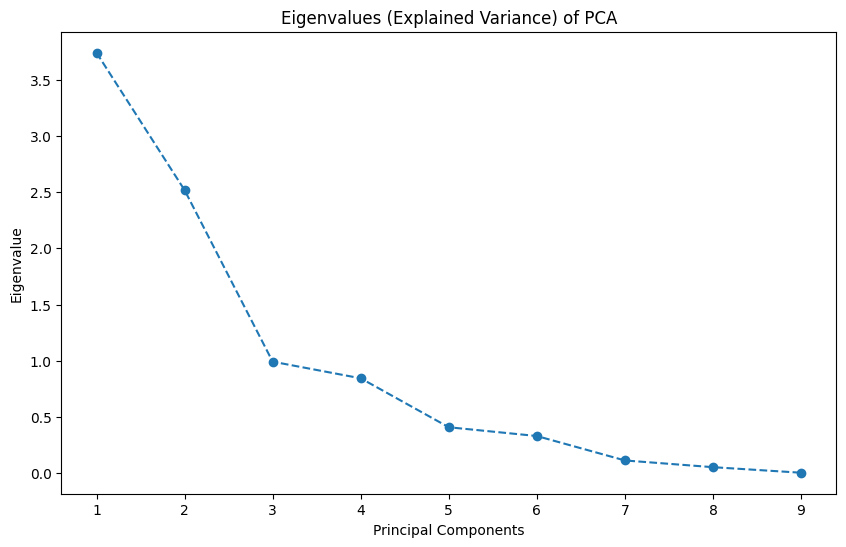

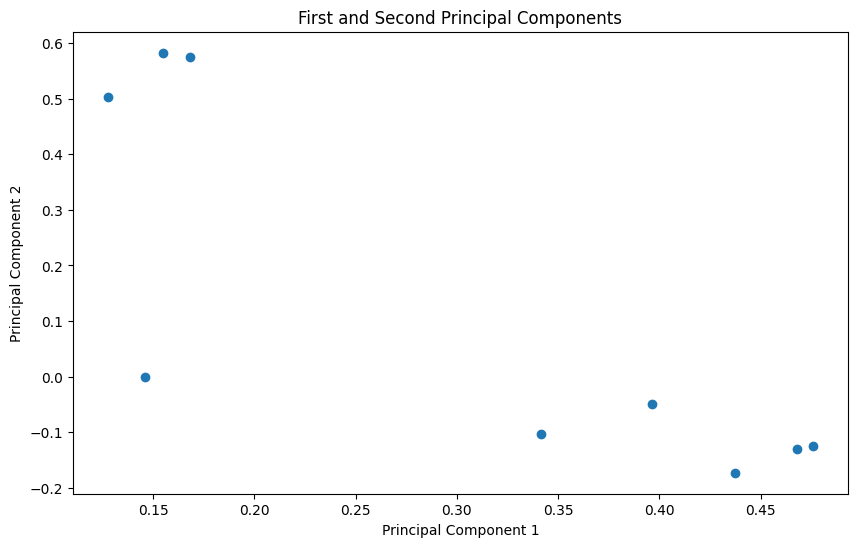

In [ ]:
# Step 7: Feature Creation Complete
# Now we have the following features:
# 'open', 'high', 'low', 'close', 'volume', 'quote_asset_volume', 'number_of_trades',
# 'relative_volume', 'log_return', 'volatility', 'range', 'change', 'close_open_ratio'

# Step 8: Apply PCA
# First, we standardize the data
features = df_hourly[['volume', 'quote_asset_volume',
                      'number_of_trades', 'relative_volume', 'log_return', 'volatility',
                      'range', 'change', 'close_open_ratio']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform PCA
pca = PCA(n_components=len(features.columns))
pca.fit(scaled_features)

# Step 9: Eigenvalues and Eigenvectors
eigenvalues = pca.explained_variance_
eigenvectors = pca.components_

print("Eigenvalues:")
print(eigenvalues)

# Step 10: Visualize the explained variance ratio (scree plot)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='--')
plt.title('Eigenvalues (Explained Variance) of PCA')
plt.xlabel('Principal Components')
plt.ylabel('Eigenvalue')
plt.show()

# Step 11: Visualize the first two principal components
pc1 = pca.components_[0]
pc2 = pca.components_[1]

# Plot the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(pc1, pc2)
plt.title('First and Second Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [ ]:
# Step 12: Display the first 4 principal components with variable labels
pc_labels = features.columns

# Extract the first 4 principal components and create a DataFrame for better visualization
pc_df = pd.DataFrame(pca.components_[:4], columns=pc_labels)

# Print the first 4 principal components with variable labels
print("Principal Components (First 4):")
print(pc_df)

Principal Components (First 4):
     volume  quote_asset_volume  number_of_trades  relative_volume  \
0  0.396193            0.467910          0.475684         0.146174   
1 -0.049260           -0.129758         -0.125669        -0.000694   
2 -0.015333           -0.015978          0.025469         0.929103   
3  0.547070           -0.325104         -0.265265         0.229987   

   log_return  volatility     range    change  close_open_ratio  
0    0.154685    0.341737  0.437159  0.127841          0.168185  
1    0.582891   -0.104122 -0.172922  0.503218          0.575508  
2   -0.013805   -0.365234  0.000417 -0.043507         -0.012163  
3    0.001134    0.572158 -0.355476 -0.131640          0.026542  


**PC1**: number_of_trades, quote_asset_volume, range, volume

**PC2**: log_return, close_open_ratio, change

**PC3**: relative_volume

**PC4**: volatility, volume, quote_asset_volume

We will keep everything.

# Autoencoder

## Recommendations for Data Splitting:
Training Set:

Use historical data that represents "normal" market behavior.
Exclude 2021 and 2024 entirely to prevent the model from learning these anomalous patterns.
Include data from years where the market was relatively stable, such as 2022 and 2023, depending on the available data.
Validation Set:

Include some data from 2021 and 2024, but focus on periods with moderate activity. This ensures the model is evaluated on data with slight deviations from the training set.
Test Set:

Focus on highly volatile periods from 2021 and 2024, as this will test the model’s ability to detect anomalies under extreme conditions.


I like the idea of doing both absolute volume and relative volume (e.g., volume relative to the 30-day average). Cite paper for relative volume. I will also do volatility. Unusual spikes or dips in trading volume often indicate significant events, such as news-driven market moves, large trades, or algorithmic trading activity.
Volume anomalies often precede or coincide with price anomalies, making it a primary feature for anomaly detection.

I will also do standard deviation of log returns to see volatility. Anomalous volatility can signal unexpected market behavior that might not always show up in volume data.Markets exhibit periods of high volatility during events like announcements, panic selling, or speculative bubbles.

OHLC captures price movement patterns that volume and volatility alone might miss.
Certain candlestick patterns (e.g., "doji" or "engulfing") are commonly associated with reversals or continuation trends and can help identify anomalies.
How to Use It:
Include features like:
Price Range: High - Low (intraday volatility).
Change: Close - Open (direction of movement).
Close/Open Ratios: To capture momentum or stagnation.
Use these features as input to the autoencoder for better representation of price behavior.

## Adding Variables of Interest to Minute Data
We need to make sure we have the same variables in our minute-level data that we used for our PCA of our aggregated hour-level data. Remember, we will be transforming our data into matricies representing an hour. We are trying to find hourly anomalies

In [ ]:
# Relative Volume: Volume relative to the moving average 24 hours
# A 24-hour MA adds some stability to volume measure
df['relative_volume'] = df['volume'] / df['volume'].rolling(window=60*24).mean()

# Log Return: Logarithmic difference between current close and previous close
df['log_return'] = np.log(df['close'] / df['close'].shift(1))

# Volatility: Rolling standard deviation of log returns (over a window of 24 hours)
df['volatility'] = df['log_return'].rolling(window=60*24).std()

# Range: Difference between the high and low price for each minute
df['range'] = df['high'] - df['low']

# Change: Difference between current close and previous close
df['change'] = df['close'] - df['close'].shift(1)

# Close to Open Ratio: Ratio of close price to open price
df['close_open_ratio'] = df['close'] / df['open']

# Optional: Drop rows with NaN values caused by rolling window calculations
df.dropna(inplace=True)

In [ ]:
df.head()

,timestamp,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,ignore,relative_volume,log_return,volatility,range,change,close_open_ratio
1440,2019-07-06 12:00:00,0.003632,0.003638,0.003629,0.003629,758640.0,2019-07-06 12:00:59.999,2758.128166,12,0,0.453446,-0.001735,0.004207,9.700000e-06,-6.300000e-06,0.999201
1441,2019-07-06 12:01:00,0.003637,0.003637,0.003637,0.003637,10000.0,2019-07-06 12:01:59.999,36.366000,1,0,0.006194,0.002147,0.004161,0.000000e+00,7.800000e-06,1.000000
1442,2019-07-06 12:02:00,0.003637,0.003637,0.003637,0.003637,23923.0,2019-07-06 12:02:59.999,87.003166,2,0,0.015131,0.000055,0.004025,0.000000e+00,2.000000e-07,1.000000
1443,2019-07-06 12:03:00,0.003637,0.003637,0.003637,0.003637,7290.0,2019-07-06 12:03:59.999,26.511623,3,0,0.004749,0.000000,0.003791,1.000000e-07,0.000000e+00,1.000027
1444,2019-07-06 12:04:00,0.003637,0.003637,0.003637,0.003637,0.0,2019-07-06 12:04:59.999,0.000000,0,0,0.000000,0.000000,0.003741,0.000000e+00,0.000000e+00,1.000000


## Creating 60-Minute Matricies for Batch Processing

In [ ]:
def create_sequences(data, sequence_length=60):
    """
    Create non-overlapping sequences from the input data.

    Args:
        data (DataFrame or array-like): The input time series data.
        sequence_length (int): The length of each sequence.

    Returns:
        np.array: Non-overlapping sequences of shape (num_sequences, sequence_length, num_features).
    """
    sequences = []
    for i in range(0, len(data) - sequence_length + 1, sequence_length):  # Stride of 60
        sequences.append(data[i:i + sequence_length].values)
    return np.array(sequences)


## Train, Validation, and Test, Split

In [ ]:
# Extract the year from the timestamp for splitting
df['year'] = df.index.year

# Split data by year for train, validation, and test
train_data = df[(df['year'] < 2021) | (df['year'] == 2022) | (df['year'] == 2023)]  # Data before 2021 and 2022/2023 for training
val_data = df[df['year'] == 2021]  # Data from 2021 for validation
test_data = df[df['year'] == 2024]  # Data from 2024 for testing

# Create non-overlapping sequences for train, validation, and test without OHLC features
X_train = create_sequences(train_data[['volume', 'quote_asset_volume', 'number_of_trades',
                                       'relative_volume', 'log_return', 'volatility', 'range', 'change',
                                       'close_open_ratio']])

X_val = create_sequences(val_data[['volume', 'quote_asset_volume', 'number_of_trades',
                                    'relative_volume', 'log_return', 'volatility', 'range', 'change',
                                    'close_open_ratio']])

X_test = create_sequences(test_data[['volume', 'quote_asset_volume', 'number_of_trades',
                                      'relative_volume', 'log_return', 'volatility', 'range', 'change',
                                      'close_open_ratio']])

# Check the shape of the datasets
print(f"Train shape: {X_train.shape}")
print(f"Validation shape: {X_val.shape}")
print(f"Test shape: {X_test.shape}")


Train shape: (30553, 60, 9)
Validation shape: (8743, 60, 9)
Test shape: (8043, 60, 9)


## Normalize Data

In [ ]:
# Normalize function
def normalize_data(data, mean, std):
    return (data - mean) / std

# Calculate mean and std from the training data
train_mean = X_train.mean(axis=0)
train_std = X_train.std(axis=0)

# Normalize the train, validation, and test data using the train mean and std
X_train_normalized = normalize_data(X_train, train_mean, train_std)
X_val_normalized = normalize_data(X_val, train_mean, train_std)
X_test_normalized = normalize_data(X_test, train_mean, train_std)

# Check the shape of the normalized datasets
print(f"Train shape after normalization: {X_train_normalized.shape}")
print(f"Validation shape after normalization: {X_val_normalized.shape}")
print(f"Test shape after normalization: {X_test_normalized.shape}")


Train shape after normalization: (30553, 60, 9)
Validation shape after normalization: (8743, 60, 9)
Test shape after normalization: (8043, 60, 9)


## Building The LTSM Autoencoder Architecture

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, RepeatVector, TimeDistributed, Dense
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# LSTM Autoencoder model
def build_lstm_autoencoder(seq_length=60, n_features=9):
    # Encoder
    inputs = Input(shape=(seq_length, n_features))
    encoded = LSTM(64, activation='tanh', return_sequences=False)(inputs)  # Changed activation to 'tanh'

    # Bottleneck
    bottleneck = RepeatVector(seq_length)(encoded)

    # Decoder
    decoded = LSTM(64, activation='tanh', return_sequences=True)(bottleneck)  # Changed activation to 'tanh'
    decoded = TimeDistributed(Dense(n_features))(decoded)  # Output layer

    # Model
    autoencoder = Model(inputs, decoded)
    autoencoder.compile(optimizer='adam', loss='mse')

    return autoencoder


# Build the model
model = build_lstm_autoencoder()
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 60, 9)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 64)                  │          18,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector (RepeatVector)         │ (None, 60, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 60, 64)              │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed (TimeDistributed)   │ (None, 60, 9)               │             585 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,553 (205.29 KB)

 Trainable params: 52,553 (205.29 KB)

 Non-trainable params: 0 (0.00 B)

## Training the Model

In [ ]:
# Early stopping based on training loss with a minimum delta of 0.001
early_stopping = EarlyStopping(monitor='loss',  # Monitor the training loss
                               patience=10,    # Patience of 10 epochs
                               min_delta=0.001,  # Stop if the loss doesn't improve by 0.001
                               restore_best_weights=True)  # Restore the best weights when stopping


# Train the model
history = model.fit(X_train_normalized, X_train_normalized, epochs=200, batch_size=64,
                    validation_data=(X_val_normalized, X_val_normalized), callbacks=[early_stopping])

# Save the model
model.save("lstm_autoencoder.h5")

Epoch 1/200
478/478 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - loss: 0.5792 - val_loss: 25.8249
Epoch 2/200
478/478 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - loss: 0.5536 - val_loss: 25.5881
Epoch 3/200
478/478 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - loss: 0.6172 - val_loss: 24.0961
Epoch 4/200
478/478 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 0.5725 - val_loss: 24.9055
Epoch 5/200
478/478 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - loss: 0.5625 - val_loss: 24.3056
Epoch 6/200
478/478 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - loss: 0.5763 - val_loss: 25.3238
Epoch 7/200
478/478 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - loss: 0.5541 - val_loss: 23.7805
Epoch 8/200
478/478 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.5711 - val_loss: 24.1171
Epoch 9/200
478/478 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - loss: 0.5702 - val_loss: 23.8735
Epoch 10/200
478/478 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.5489 - val_loss: 23.9174
Epoch 11/200
478/478 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.5585 - val_loss: 23.7429
Epoch 12/200
47

## Visualizing Training Process (looking at reconstruction loss over epochs)

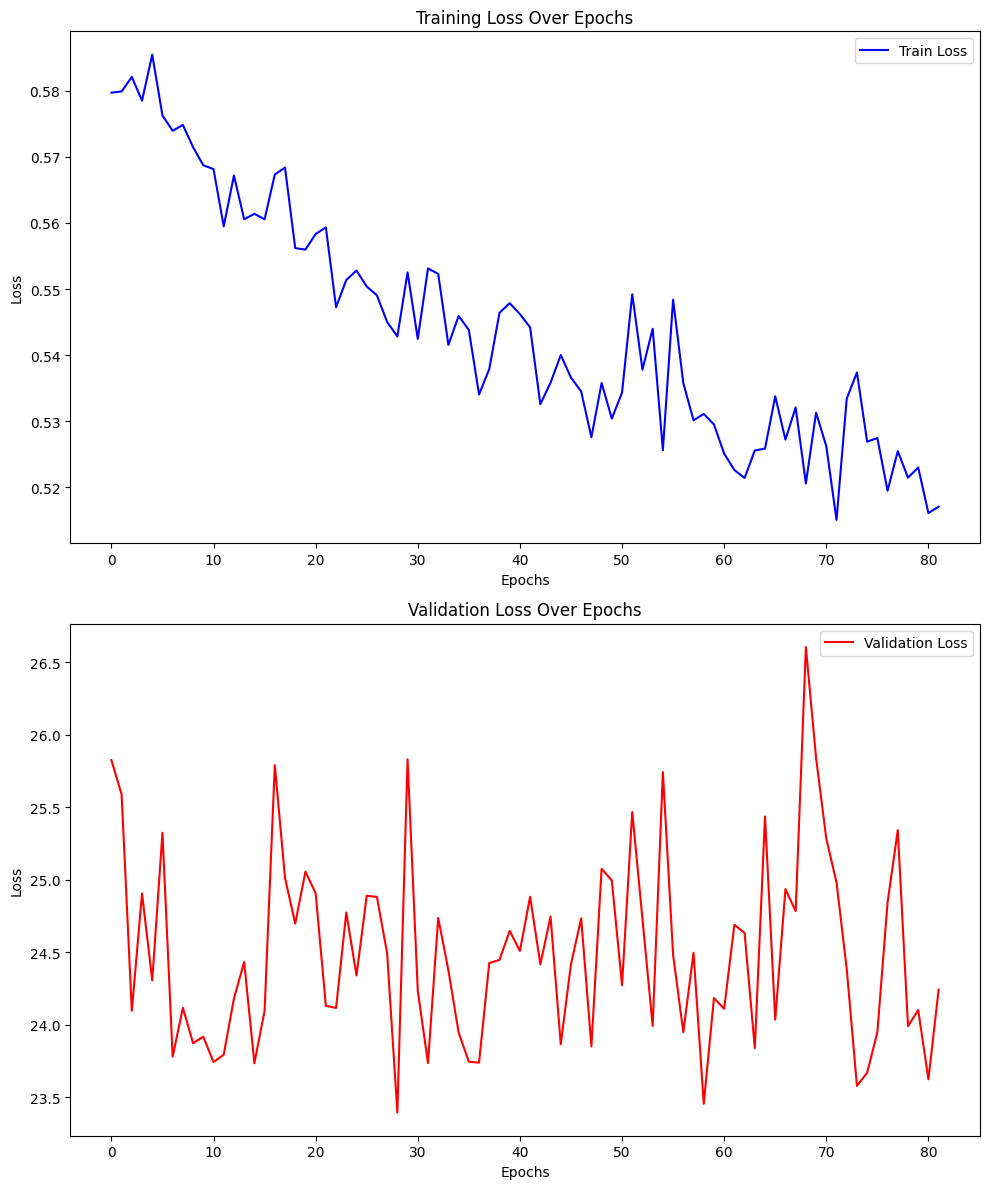

In [ ]:
# Get the training and validation loss from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create a figure with two subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# Plot Training Loss
ax[0].plot(train_loss, label='Train Loss', color='blue')
ax[0].set_title('Training Loss Over Epochs')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()

# Plot Validation Loss
ax[1].plot(val_loss, label='Validation Loss', color='red')
ax[1].set_title('Validation Loss Over Epochs')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend()

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

## Exploring Train and Validation Reconstruction Loss
Now I want to explore what our train and validation reconstruction loss look like for each hour. We need to be able to identify some kind of threshold for what amount of loss determines an anomaly.

In [ ]:
# Run now after starting a new runtime
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import MeanSquaredError

# Define the custom objects
custom_objects = {
    "mse": MeanSquaredError()
}

# Load the model with custom objects
model_path = "/content/drive/MyDrive/DL6600/FinalProject/lstm_autoencoder.h5"
model = load_model(model_path, custom_objects=custom_objects)

In [ ]:
# Reconstruct the training and validation data
train_reconstructions = model.predict(X_train_normalized)
val_reconstructions = model.predict(X_val_normalized)

955/955 ━━━━━━━━━━━━━━━━━━━━ 112s 116ms/step
274/274 ━━━━━━━━━━━━━━━━━━━━ 45s 165ms/step


In [ ]:
# Calculate the reconstruction loss (MSE) for each data point
train_losses = np.mean(np.square(X_train_normalized - train_reconstructions), axis=(1, 2))
val_losses = np.mean(np.square(X_val_normalized - val_reconstructions), axis=(1, 2))

In [ ]:
# Analyze the distribution of training reconstruction losses
mean_loss = np.mean(train_losses)
std_loss = np.std(train_losses)

I am chossing train mean + 4 * train std to be the threshold for anomalies. Usually, we might do 3*sd, but I want to be a little more conservative and add some robustness against some of the volatility bc we are dealing with the sometimes wacky market behavior of cryptocurrency.

In [ ]:
# Set the threshold (e.g., mean + 4 * std)
threshold = mean_loss + 4 * std_loss
print(f"Anomaly Threshold: {threshold}")

Anomaly Threshold: 10.424206289425026


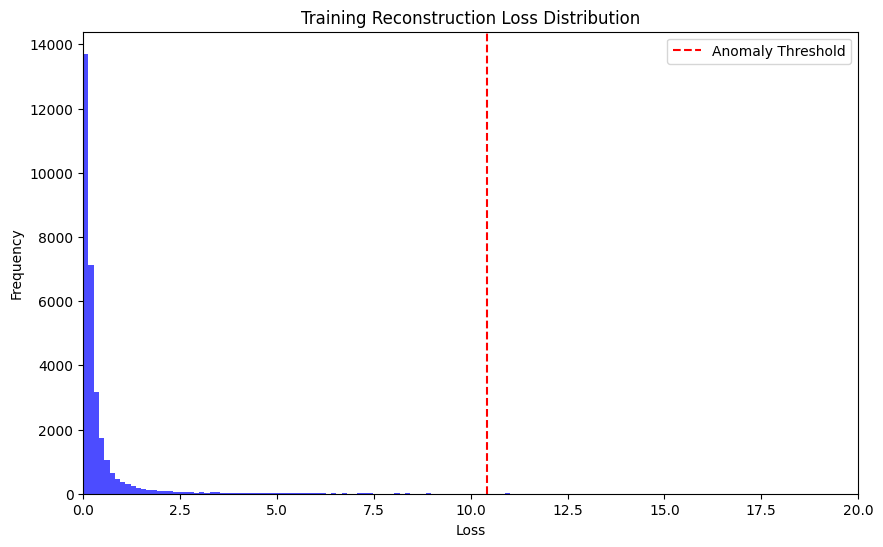

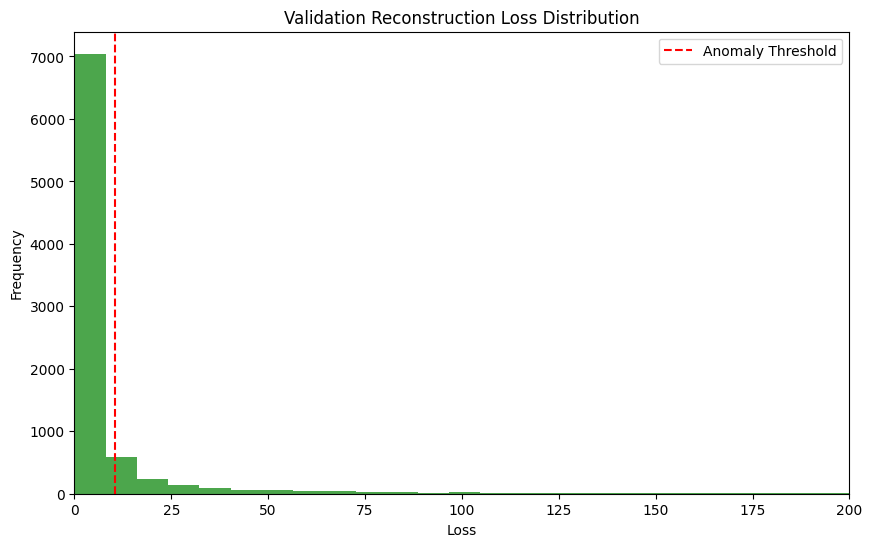

In [ ]:
# Plot the distribution of training losses
plt.figure(figsize=(10, 6))
plt.hist(train_losses, bins=1000, alpha=0.7, color='blue')
plt.axvline(threshold, color='red', linestyle='--', label='Anomaly Threshold')
plt.title('Training Reconstruction Loss Distribution')
plt.xlabel('Loss')
plt.ylabel('Frequency')
plt.xlim(0, 20)  # Set the maximum x-axis value to 20
plt.legend()
plt.show()

# Plot the distribution of validation losses
plt.figure(figsize=(10, 6))
plt.hist(val_losses, bins=1000, alpha=0.7, color='green')
plt.axvline(threshold, color='red', linestyle='--', label='Anomaly Threshold')
plt.title('Validation Reconstruction Loss Distribution')
plt.xlabel('Loss')
plt.ylabel('Frequency')
plt.xlim(0, 200)  # Set the maximum x-axis value to 200
plt.legend()
plt.show()


In [ ]:
# Identify anomalies in val data (2021)
val_anomalies = val_losses > threshold

In [ ]:
train_anomalies = train_losses > threshold

## Visualizing Train and Validation Anomalies

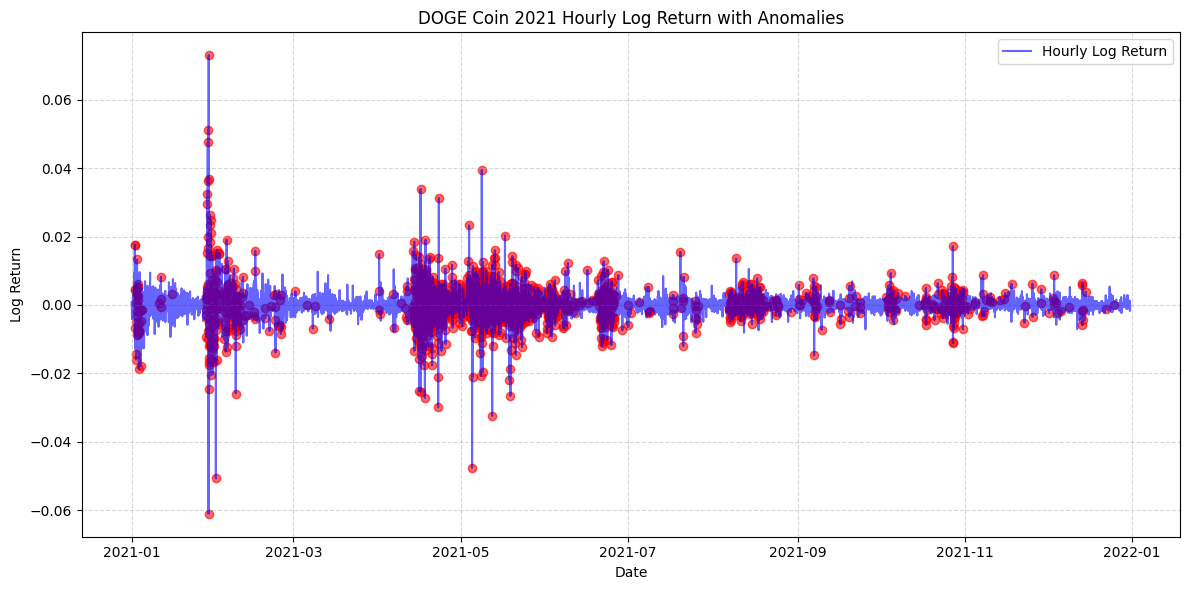

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming you have 'X_val' with shape (8743, 60, 9) and anomalies array for the same length

# Flatten X_val to get the log return for each hour (5th feature corresponds to index 4 in the matrix)
log_return_values = X_val[:, -1, 4]  # Extract the log return at the last minute of each hour

# Create a time axis for plotting (assuming the data starts at a specific time)
time_index = pd.date_range(start='2021-01-01', periods=log_return_values.shape[0], freq='H')

# Create the plot for log returns
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the hourly log return values
ax1.plot(time_index, log_return_values, label='Hourly Log Return', color='blue', alpha=0.6)

# Set labels and title
ax1.set_title('DOGE Coin 2021 Hourly Log Return with Anomalies')
ax1.set_ylabel('Log Return')
ax1.set_xlabel('Date')
ax1.legend(loc='upper right')
ax1.grid(True, linestyle='--', alpha=0.5)


# Highlight anomalies in red on the plot
ax1.scatter(time_index[val_anomalies], log_return_values[val_anomalies], color='red', label='Anomalies', alpha=0.6)

# Adjust layout for better spacing
fig.tight_layout()

# Show the plot
plt.show()


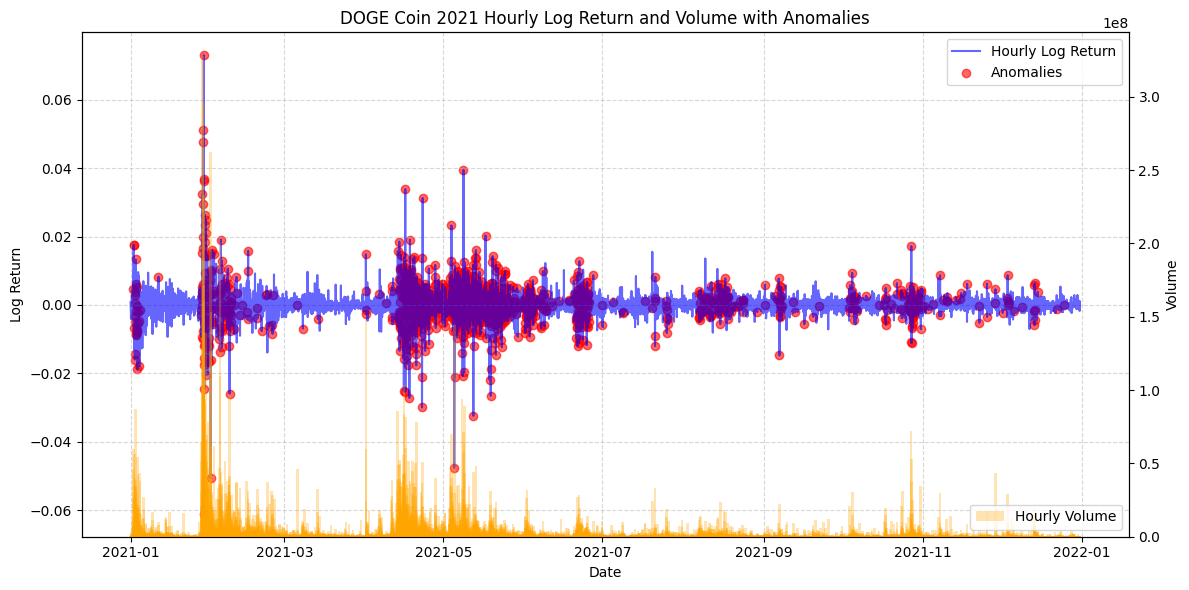

In [ ]:
# Flatten X_val to get the log return (5th feature) and volume (1st feature) for each hour
log_return_values = X_val[:, -1, 4]  # Log return at the last minute of each hour
volume_values = X_val[:, -1, 0]  # Volume at the last minute of each hour

# Create a time axis for plotting (assuming the data starts at a specific time)
time_index = pd.date_range(start='2021-01-01', periods=log_return_values.shape[0], freq='H')

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the hourly log return values
ax1.plot(time_index, log_return_values, label='Hourly Log Return', color='blue', alpha=0.6)
ax1.scatter(time_index[val_anomalies], log_return_values[val_anomalies], color='red', label='Anomalies', alpha=0.6)
ax1.set_title('DOGE Coin 2021 Hourly Log Return and Volume with Anomalies')
ax1.set_ylabel('Log Return')
ax1.set_xlabel('Date')
ax1.legend(loc='upper right')
ax1.grid(True, linestyle='--', alpha=0.5)

# Add the volume as a secondary y-axis
ax2 = ax1.twinx()
ax2.bar(time_index, volume_values, label='Hourly Volume', color='orange', alpha=0.3, width=1)
ax2.set_ylabel('Volume')
ax2.legend(loc='lower right')

# Adjust layout for better spacing
fig.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Count the number of False values (non-anomalies) in the val_anomalies array
num_false_anomalies = np.sum(~val_anomalies)  # ~anomalies flips the boolean values (True becomes False, and False becomes True)

# Get the indices where anomalies are False
false_anomalies_indices = np.where(~val_anomalies)[0]  # Returns the indices where the condition is True (i.e., False in the anomalies array)

# Print the results
print(f"Number of False anomalies: {num_false_anomalies}")
print(f"Indices of False anomalies: {false_anomalies_indices}")


Number of False anomalies: 7025
Indices of False anomalies: [   0    1    2 ... 8740 8741 8742]


In [ ]:
# Count the number of False values in the trainanomalies array
num_false_anomalies = np.sum(~train_anomalies)  # ~anomalies flips the boolean values (True becomes False, and False becomes True)

# Get the indices where anomalies are False
false_anomalies_indices = np.where(~train_anomalies)[0]  # Returns the indices where the condition is True (i.e., False in the anomalies array)

# Print the results
print(f"Number of False anomalies: {num_false_anomalies}")
print(f"Indices of False anomalies: {false_anomalies_indices}")


Number of False anomalies: 30417
Indices of False anomalies: [    0     1     2 ... 30550 30551 30552]


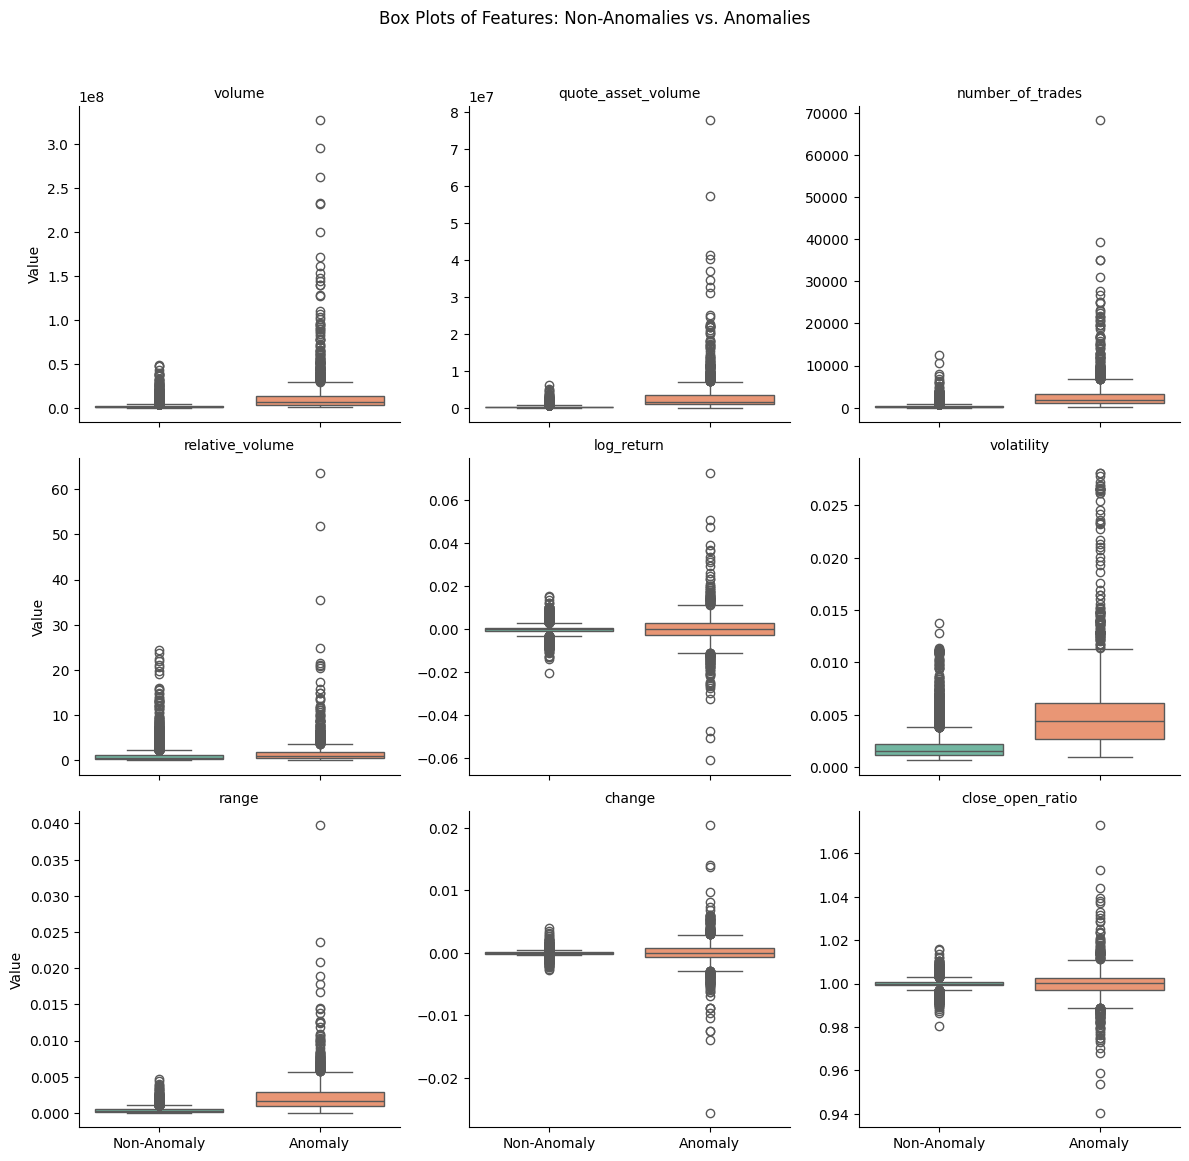

In [ ]:
# Features in the dataset
features = ['volume', 'quote_asset_volume', 'number_of_trades',
            'relative_volume', 'log_return', 'volatility',
            'range', 'change', 'close_open_ratio']

# Convert X_val to a DataFrame (flattening the last time step for simplicity)
X_val_df = pd.DataFrame(X_val[:, -1, :], columns=features)

# Create a column for anomaly labels
X_val_df['anomaly'] = np.where(val_anomalies, 'Anomaly', 'Non-Anomaly')

# Melt the DataFrame for FacetGrid
melted_df = X_val_df.melt(id_vars='anomaly', var_name='Feature', value_name='Value')

# Create a FacetGrid and plot boxplots
g = sns.FacetGrid(melted_df, col="Feature", col_wrap=3, sharey=False, height=4)
g.map(sns.boxplot, 'anomaly', 'Value', order=['Non-Anomaly', 'Anomaly'], palette="Set2")

# Adjust the layout
g.set_titles("{col_name}")
g.set_axis_labels("", "Value")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Box Plots of Features: Non-Anomalies vs. Anomalies")

plt.show()

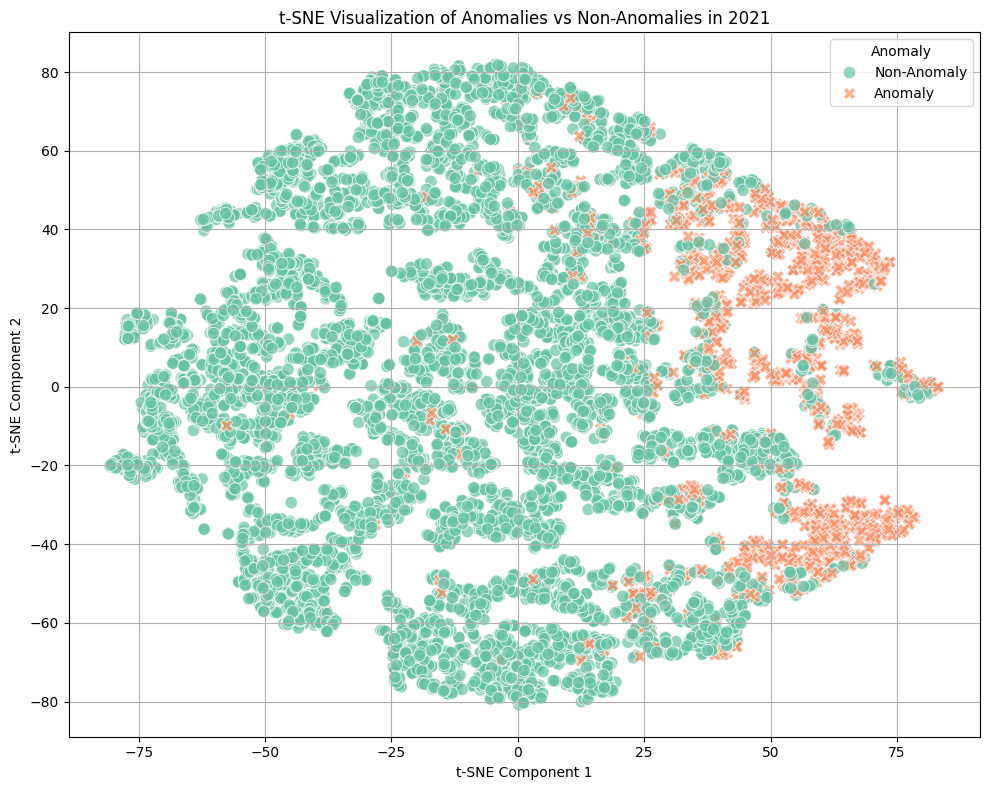

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Assuming X_val is the validation data and val_anomalies are the anomaly labels

# Features in the dataset
features = ['volume', 'quote_asset_volume', 'number_of_trades',
            'relative_volume', 'log_return', 'volatility',
            'range', 'change', 'close_open_ratio']

# Convert X_val to a DataFrame (flattening the last time step for simplicity)
X_val_df = pd.DataFrame(X_val[:, -1, :], columns=features)

# Standardize the features (important for t-SNE)
scaler = StandardScaler()
X_val_scaled = scaler.fit_transform(X_val_df)

# Apply t-SNE to reduce dimensionality to 2D
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_val_scaled)

# Add t-SNE results to the DataFrame
X_val_df['TSNE_1'] = X_tsne[:, 0]
X_val_df['TSNE_2'] = X_tsne[:, 1]

# Add anomaly labels to the DataFrame
X_val_df['anomaly'] = np.where(val_anomalies, 'Anomaly', 'Non-Anomaly')

# Create a scatter plot of the t-SNE results
plt.figure(figsize=(10, 8))
sns.scatterplot(data=X_val_df, x='TSNE_1', y='TSNE_2', hue='anomaly', style='anomaly', palette='Set2', s=80, alpha=0.7)

# Set labels and title
plt.title('t-SNE Visualization of Anomalies vs Non-Anomalies in 2021')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Anomaly', loc='best')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
val_data.head()

,volume,close_time,quote_asset_volume,number_of_trades,relative_volume,log_return,volatility,range,change,close_open_ratio,year
timestamp,,,,,,,,,,,
2021-01-01 00:00:00,76079.0,2021-01-01 00:00:59.999,355.408929,3,0.117842,0.000150,0.001627,7.000000e-07,7.000000e-07,1.000000,2021
2021-01-01 00:01:00,764452.0,2021-01-01 00:01:59.999,3574.888333,19,1.183152,0.001839,0.001627,1.200000e-05,8.600000e-06,1.001498,2021
2021-01-01 00:02:00,563854.0,2021-01-01 00:02:59.999,2636.791356,10,0.872545,-0.000962,0.001627,1.040000e-05,-4.500000e-06,0.997887,2021
2021-01-01 00:03:00,517363.0,2021-01-01 00:03:59.999,2418.343989,10,0.801086,0.000064,0.001627,4.800000e-06,3.000000e-07,1.001028,2021
2021-01-01 00:04:00,452148.0,2021-01-01 00:04:59.999,2113.387958,15,0.701022,-0.000043,0.001625,1.510000e-05,-2.000000e-07,0.999893,2021


## Visualizing Anomalies in the Test Set


In [ ]:
test_reconstructions = model.predict(X_test_normalized)
test_losses = np.mean(np.square(X_test_normalized - test_reconstructions), axis=(1, 2))

252/252 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step


In [ ]:
test_anomalies = test_losses > threshold

In [ ]:
# Count the number of False values in the test anomalies array
num_false_anomalies = np.sum(~test_anomalies)  # ~anomalies flips the boolean values (True becomes False, and False becomes True)

# Get the indices where anomalies are False
false_anomalies_indices = np.where(~test_anomalies)[0]  # Returns the indices where the condition is True (i.e., False in the anomalies array)

# Print the results
print(f"Number of False anomalies: {num_false_anomalies}")
print(f"Indices of False anomalies: {false_anomalies_indices}")


Number of False anomalies: 7645
Indices of False anomalies: [   0    1    2 ... 8037 8038 8039]


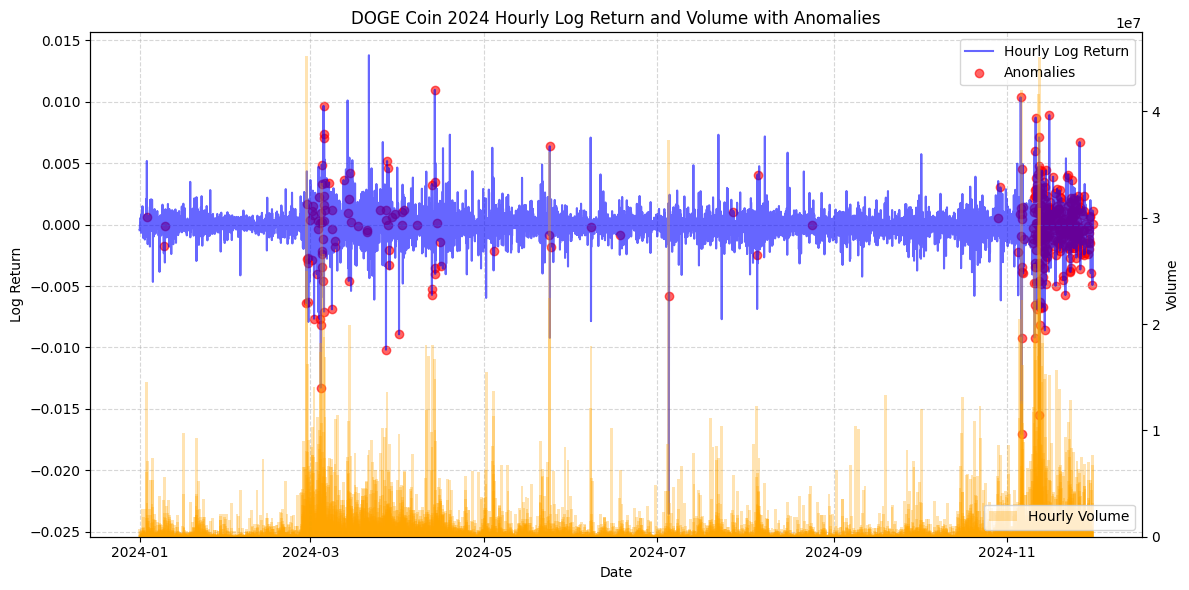

In [ ]:
# Flatten X_test to get the log return (5th feature) and volume (1st feature) for each hour
log_return_values_test = X_test[:, -1, 4]  # Log return at the last minute of each hour
volume_values_test = X_test[:, -1, 0]  # Volume at the last minute of each hour

# Create a time axis for plotting (adjust the start date to match your 2024 data)
time_index_test = pd.date_range(start='2024-01-01', periods=log_return_values_test.shape[0], freq='H')

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the hourly log return values
ax1.plot(time_index_test, log_return_values_test, label='Hourly Log Return', color='blue', alpha=0.6)
ax1.scatter(time_index_test[test_anomalies], log_return_values_test[test_anomalies], color='red', label='Anomalies', alpha=0.6)
ax1.set_title('DOGE Coin 2024 Hourly Log Return and Volume with Anomalies')
ax1.set_ylabel('Log Return')
ax1.set_xlabel('Date')
ax1.legend(loc='upper right')
ax1.grid(True, linestyle='--', alpha=0.5)

# Add the volume as a secondary y-axis
ax2 = ax1.twinx()
ax2.bar(time_index_test, volume_values_test, label='Hourly Volume', color='orange', alpha=0.3, width=1)
ax2.set_ylabel('Volume')
ax2.legend(loc='lower right')

# Adjust layout for better spacing
fig.tight_layout()

# Show the plot
plt.show()


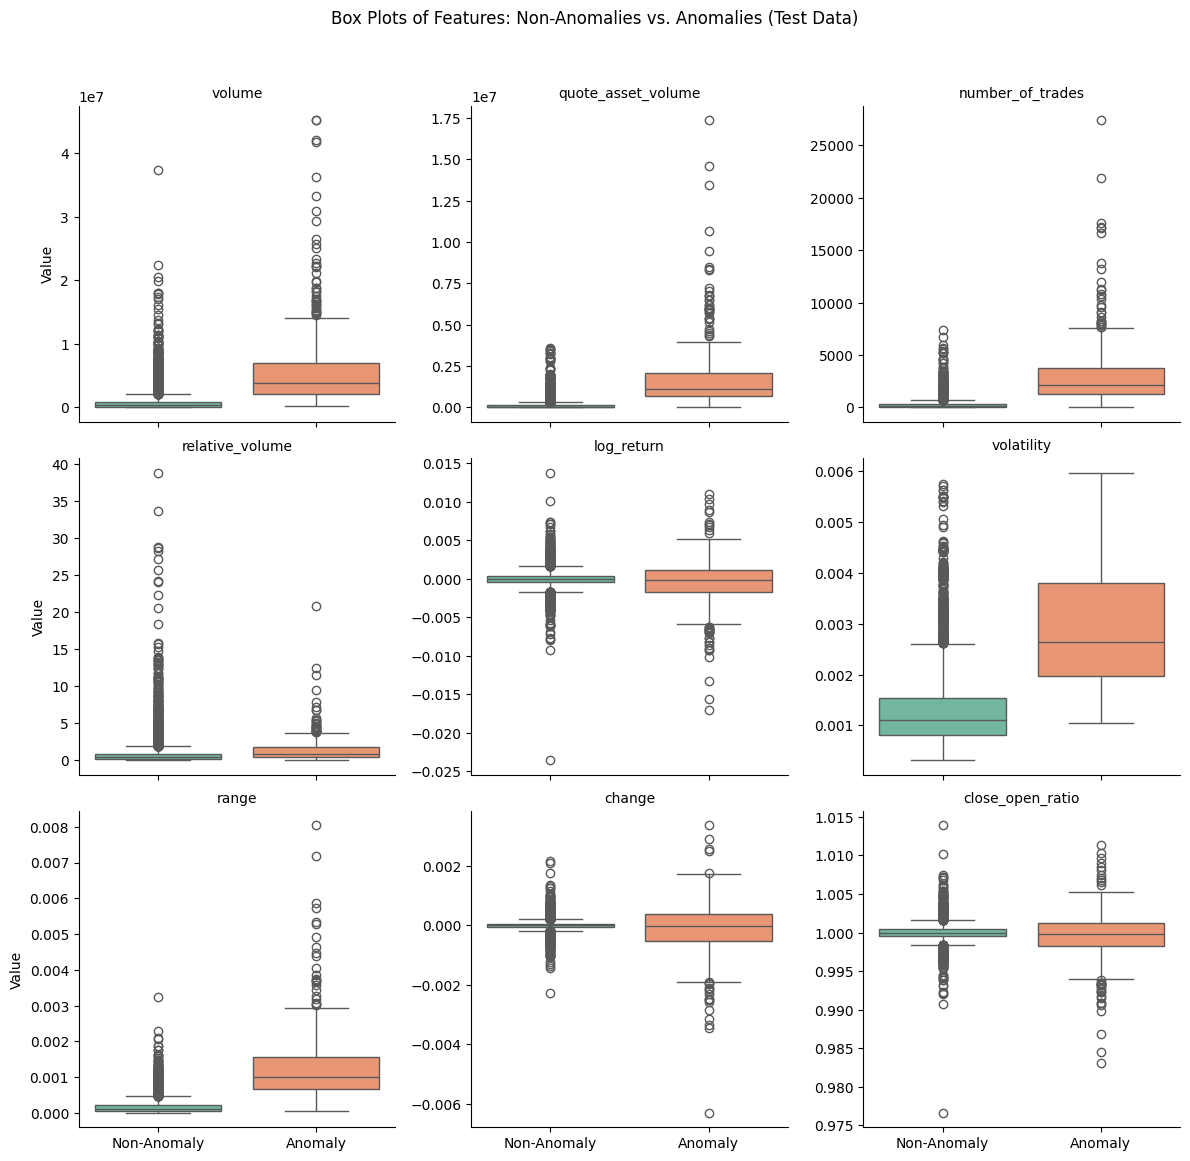

In [ ]:
# Features in the dataset
features = ['volume', 'quote_asset_volume', 'number_of_trades',
            'relative_volume', 'log_return', 'volatility',
            'range', 'change', 'close_open_ratio']

# Convert X_test to a DataFrame (flattening the last time step for simplicity)
X_test_df = pd.DataFrame(X_test[:, -1, :], columns=features)

# Create a column for anomaly labels
X_test_df['anomaly'] = np.where(test_anomalies, 'Anomaly', 'Non-Anomaly')

# Melt the DataFrame for FacetGrid
melted_df_test = X_test_df.melt(id_vars='anomaly', var_name='Feature', value_name='Value')

# Create a FacetGrid and plot boxplots
g_test = sns.FacetGrid(melted_df_test, col="Feature", col_wrap=3, sharey=False, height=4)
g_test.map(sns.boxplot, 'anomaly', 'Value', order=['Non-Anomaly', 'Anomaly'], palette="Set2")

# Adjust the layout
g_test.set_titles("{col_name}")
g_test.set_axis_labels("", "Value")
g_test.fig.subplots_adjust(top=0.9)
g_test.fig.suptitle("Box Plots of Features: Non-Anomalies vs. Anomalies (Test Data)")

plt.show()


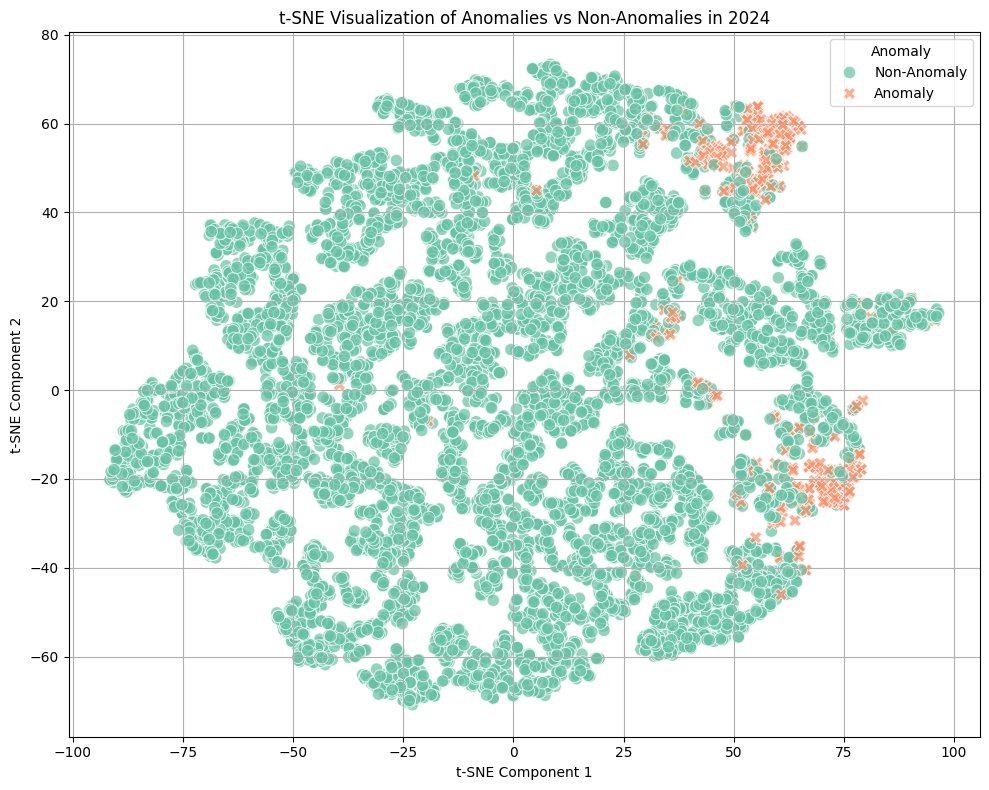

In [ ]:
# Assuming X_test is the test data and test_anomalies are the anomaly labels

# Convert X_test to a DataFrame (flattening the last time step for simplicity)
X_test_df = pd.DataFrame(X_test[:, -1, :], columns=features)

# Standardize the features (important for t-SNE)
X_test_scaled = scaler.transform(X_test_df)  # Use the same scaler used for X_val

# Apply t-SNE to reduce dimensionality to 2D
X_tsne_test = tsne.fit_transform(X_test_scaled)

# Add t-SNE results to the DataFrame
X_test_df['TSNE_1'] = X_tsne_test[:, 0]
X_test_df['TSNE_2'] = X_tsne_test[:, 1]

# Add anomaly labels to the DataFrame
X_test_df['anomaly'] = np.where(test_anomalies, 'Anomaly', 'Non-Anomaly')

# Create a scatter plot of the t-SNE results
plt.figure(figsize=(10, 8))
sns.scatterplot(data=X_test_df, x='TSNE_1', y='TSNE_2', hue='anomaly', style='anomaly', palette='Set2', s=80, alpha=0.7)

# Set labels and title
plt.title('t-SNE Visualization of Anomalies vs Non-Anomalies in 2024')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Anomaly', loc='best')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


# PCA Analysis of Anomalies vs Non-Anomalies

In [ ]:
from sklearn.decomposition import PCA

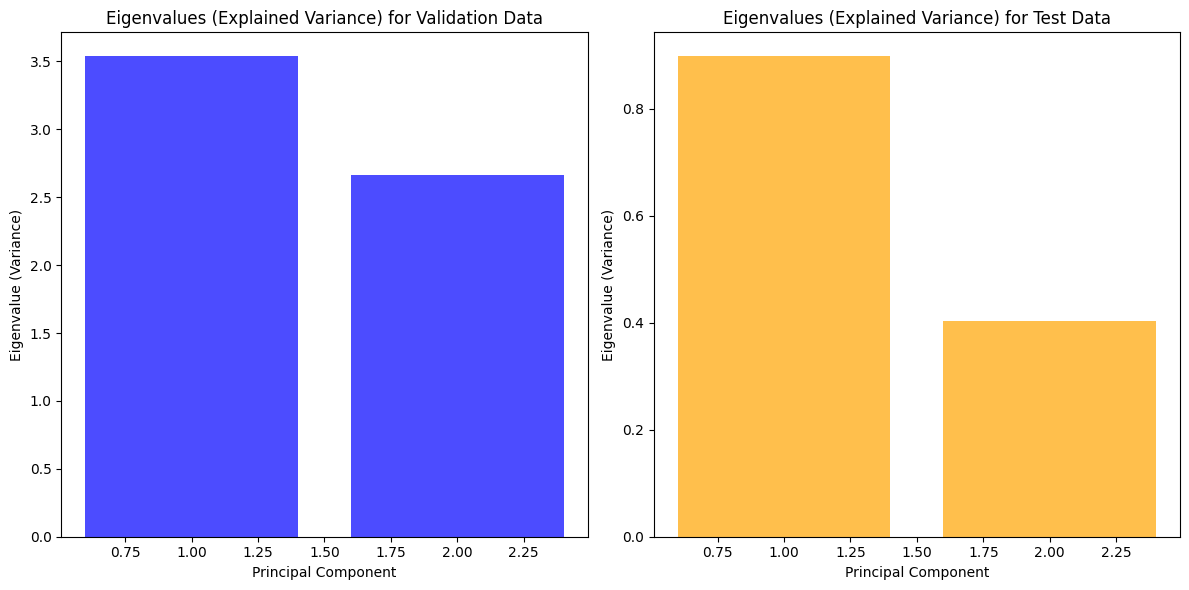

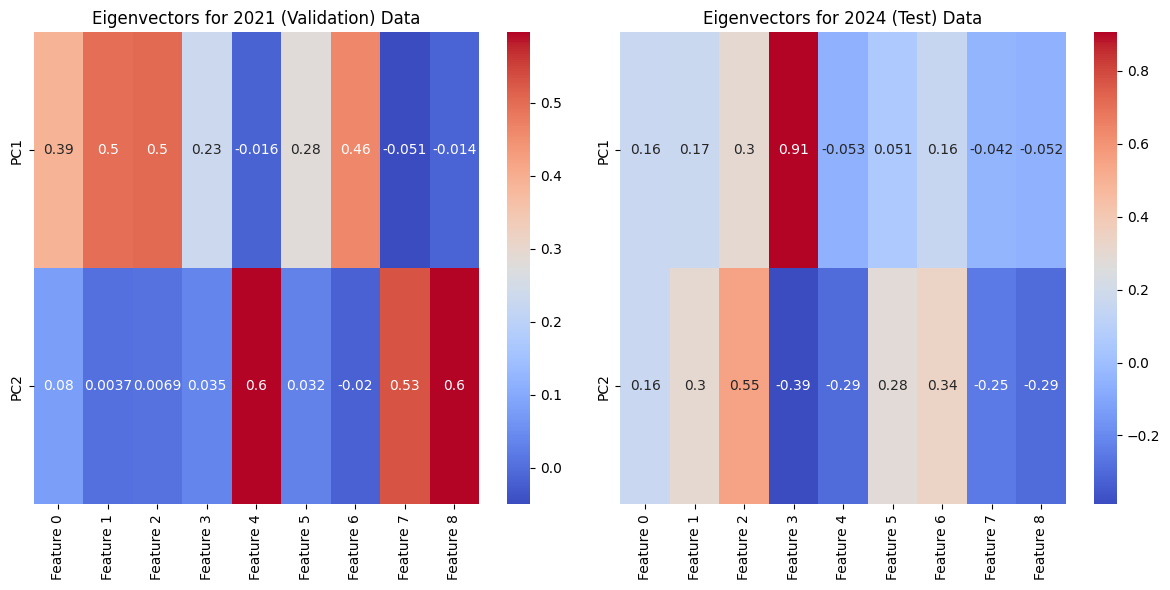

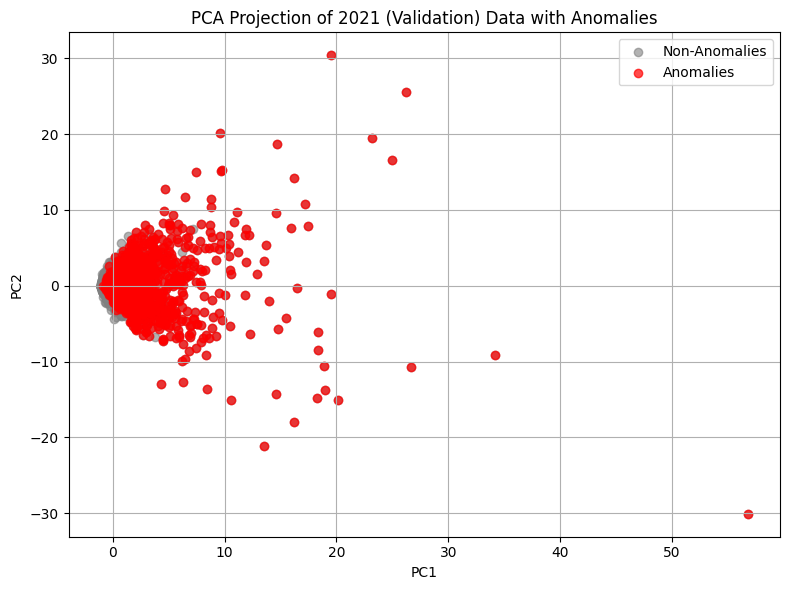

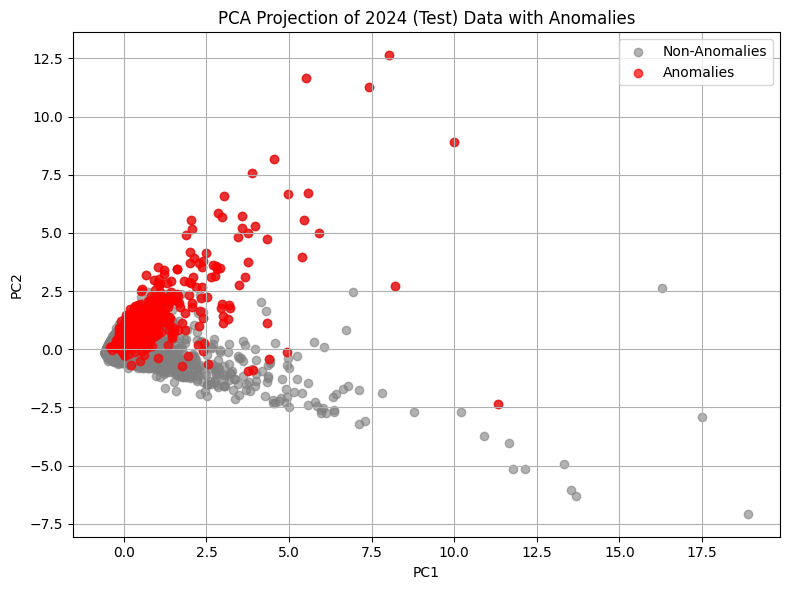

In [ ]:
# Flatten X_val and X_test to have 2D data: (samples, features)
X_val_flat = X_val[:, -1, :]  # Flattening the last time step for simplicity
X_test_flat = X_test[:, -1, :]  # Flattening the last time step for simplicity

# Standardize the validation and test data
scaler = StandardScaler()

# Fit the scaler on the validation data and transform both validation and test data
X_val_scaled = scaler.fit_transform(X_val_flat)
X_test_scaled = scaler.transform(X_test_flat)  # Use the same scaler for test data

# Apply PCA to reduce to 2 components
pca_val = PCA(n_components=2)
pca_test = PCA(n_components=2)

# PCA transformation for both datasets
X_val_pca = pca_val.fit_transform(X_val_scaled)
X_test_pca = pca_test.fit_transform(X_test_scaled)

# Eigenvalues and eigenvectors for both validation and test data
eigenvalues_val = pca_val.explained_variance_
eigenvectors_val = pca_val.components_

eigenvalues_test = pca_test.explained_variance_
eigenvectors_test = pca_test.components_

# Visualize the explained variance (Eigenvalues)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(range(1, len(eigenvalues_val) + 1), eigenvalues_val, color='blue', alpha=0.7)
plt.title('Eigenvalues (Explained Variance) for Validation Data')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue (Variance)')

plt.subplot(1, 2, 2)
plt.bar(range(1, len(eigenvalues_test) + 1), eigenvalues_test, color='orange', alpha=0.7)
plt.title('Eigenvalues (Explained Variance) for Test Data')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue (Variance)')

plt.tight_layout()
plt.show()

# Visualize the eigenvectors (Principal Components) for both datasets
plt.figure(figsize=(12, 6))

# Plot eigenvectors for validation data
plt.subplot(1, 2, 1)
sns.heatmap(eigenvectors_val, annot=True, cmap='coolwarm', xticklabels=['Feature ' + str(i) for i in range(X_val_flat.shape[1])], yticklabels=['PC1', 'PC2'])
plt.title('Eigenvectors for 2021 (Validation) Data')

# Plot eigenvectors for test data
plt.subplot(1, 2, 2)
sns.heatmap(eigenvectors_test, annot=True, cmap='coolwarm', xticklabels=['Feature ' + str(i) for i in range(X_test_flat.shape[1])], yticklabels=['PC1', 'PC2'])
plt.title('Eigenvectors for 2024 (Test) Data')

plt.tight_layout()
plt.show()

# Visualizing the projection of anomalies in PCA space (for both validation and test data)
# For validation anomalies
X_val_anomalies = X_val_pca[val_anomalies == 1]
plt.figure(figsize=(8, 6))
plt.scatter(X_val_pca[:, 0], X_val_pca[:, 1], label='Non-Anomalies', alpha=0.6, color='gray')
plt.scatter(X_val_anomalies[:, 0], X_val_anomalies[:, 1], label='Anomalies', color='red', alpha=0.7)
plt.title('PCA Projection of 2021 (Validation) Data with Anomalies')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# For test anomalies
X_test_anomalies = X_test_pca[test_anomalies == 1]
plt.figure(figsize=(8, 6))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], label='Non-Anomalies', alpha=0.6, color='gray')
plt.scatter(X_test_anomalies[:, 0], X_test_anomalies[:, 1], label='Anomalies', color='red', alpha=0.7)
plt.title('PCA Projection of 2024 (Test) Data with Anomalies')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

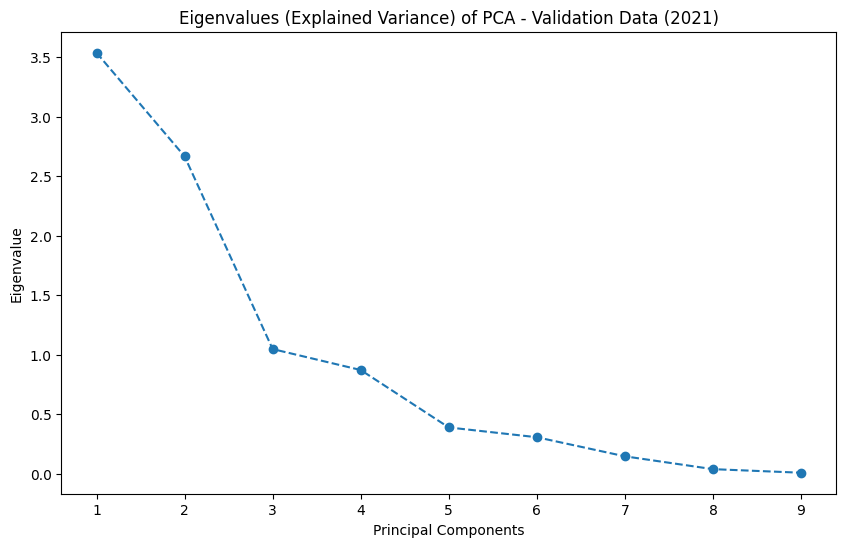

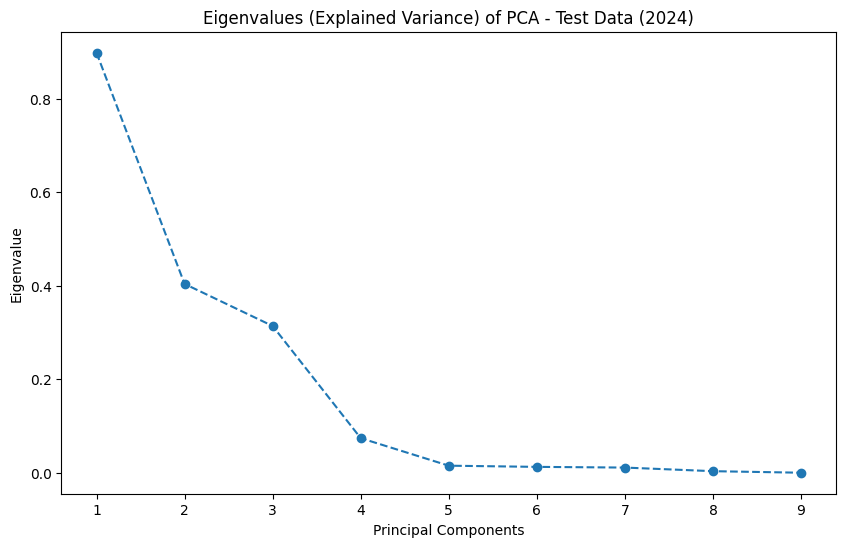

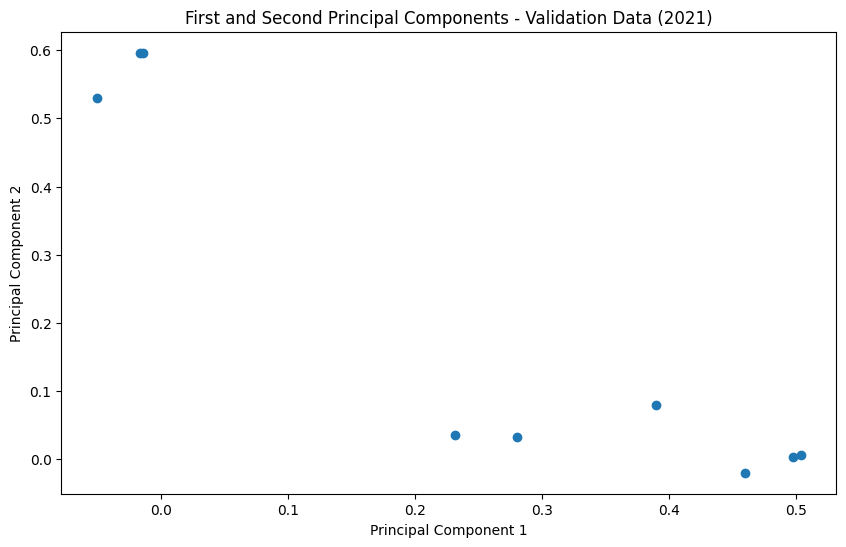

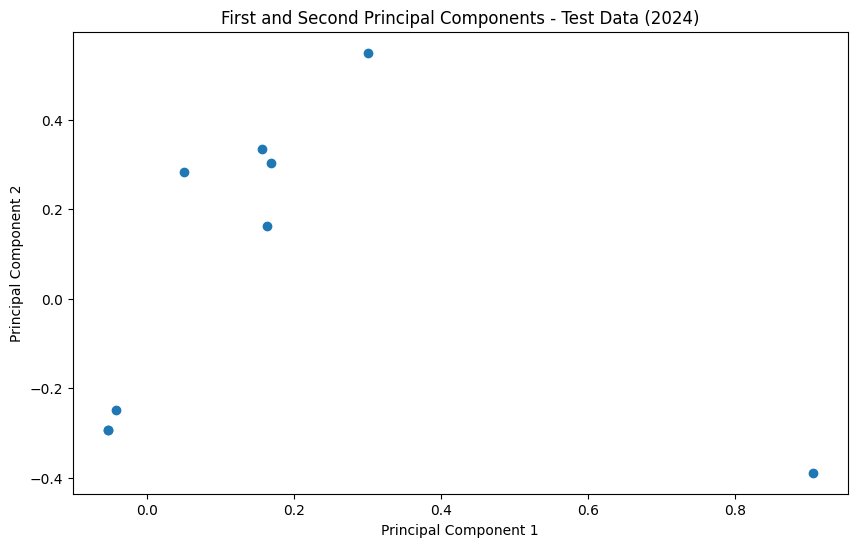

Principal Components (First 4) - Validation Data (2021):
     volume  quote_asset_volume  number_of_trades  relative_volume  \
0  0.389763            0.497636          0.503762         0.231370   
1  0.079782            0.003690          0.006859         0.035485   
2  0.217236           -0.102074         -0.111246        -0.632849   
3  0.518184           -0.276444         -0.211792         0.615338   

   log_return  volatility     range    change  close_open_ratio  
0   -0.016210    0.280472  0.459861 -0.050501         -0.013617  
1    0.596244    0.032091 -0.019740  0.529548          0.595791  
2   -0.014957    0.723432 -0.075994 -0.004502         -0.011999  
3   -0.038425    0.268318 -0.390804 -0.065699         -0.032440  
Principal Components (First 4) - Test Data (2024):
     volume  quote_asset_volume  number_of_trades  relative_volume  \
0  0.163459            0.169264          0.301487         0.905203   
1  0.163010            0.303487          0.549948        -0.388926   
2

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Flatten X_val and X_test to have 2D data: (samples, features)
X_val_flat = X_val[:, -1, :]  # Flattening the last time step for simplicity
X_test_flat = X_test[:, -1, :]  # Flattening the last time step for simplicity

# Standardizing the validation and test data
scaler = StandardScaler()

# Fit the scaler on the validation data and transform both validation and test data
X_val_scaled = scaler.fit_transform(X_val_flat)
X_test_scaled = scaler.transform(X_test_flat)  # Use the same scaler for test data

# Apply PCA on the validation data
pca_val = PCA(n_components=len(X_val_flat[0]))  # Number of components equals the number of features
pca_val.fit(X_val_scaled)

# Apply PCA on the test data
pca_test = PCA(n_components=len(X_test_flat[0]))  # Number of components equals the number of features
pca_test.fit(X_test_scaled)

# Step 1: Eigenvalues and Eigenvectors for Validation Data (2021)
eigenvalues_val = pca_val.explained_variance_
eigenvectors_val = pca_val.components_

# Step 2: Eigenvalues and Eigenvectors for Test Data (2024)
eigenvalues_test = pca_test.explained_variance_
eigenvectors_test = pca_test.components_

# Step 3: Plot Explained Variance for Validation Data (2021)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalues_val) + 1), eigenvalues_val, marker='o', linestyle='--')
plt.title('Eigenvalues (Explained Variance) of PCA - Validation Data (2021)')
plt.xlabel('Principal Components')
plt.ylabel('Eigenvalue')
plt.show()

# Step 4: Plot Explained Variance for Test Data (2024)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalues_test) + 1), eigenvalues_test, marker='o', linestyle='--')
plt.title('Eigenvalues (Explained Variance) of PCA - Test Data (2024)')
plt.xlabel('Principal Components')
plt.ylabel('Eigenvalue')
plt.show()

# Step 5: Visualize the first two principal components for Validation Data (2021)
pc1_val = pca_val.components_[0]
pc2_val = pca_val.components_[1]

plt.figure(figsize=(10, 6))
plt.scatter(pc1_val, pc2_val)
plt.title('First and Second Principal Components - Validation Data (2021)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Step 6: Visualize the first two principal components for Test Data (2024)
pc1_test = pca_test.components_[0]
pc2_test = pca_test.components_[1]

plt.figure(figsize=(10, 6))
plt.scatter(pc1_test, pc2_test)
plt.title('First and Second Principal Components - Test Data (2024)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Step 7: Display the first 4 principal components with variable labels for Validation Data (2021)
pc_labels = features  # Assuming these are the feature names in your dataset

# Extract the first 4 principal components and create a DataFrame for better visualization
pc_df_val = pd.DataFrame(pca_val.components_[:4], columns=pc_labels)

print("Principal Components (First 4) - Validation Data (2021):")
print(pc_df_val)

# Step 8: Display the first 4 principal components with variable labels for Test Data (2024)
pc_df_test = pd.DataFrame(pca_test.components_[:4], columns=pc_labels)

print("Principal Components (First 4) - Test Data (2024):")
print(pc_df_test)


### 2021/Valdiation Data
3-4 principal components

**PC1**: number_of_trades, quote_asset_volume, range, *volume*

**PC2**: log_return, close_open_ratio, change

**PC3**: volatility, - relative volume

(**PC4**: relative volume, volume)

### 2024/Test Data
1 principal component

**PC1**: relative volume (explains most of it all), *number of trades*